In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime,timedelta

### Q1 In the above dataset :

#### a. In case age is less than 18, replace it with mean of age values.

In [2]:
Customer_Acq = pd.read_csv("Customer Acqusition.csv")

In [3]:
Customer_Acq.head(5)

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [4]:
df = pd.DataFrame(Customer_Acq)
df.loc[df['Age']<18,'Age'] = df.Age.mean()
df

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34.0,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47.0,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56.0,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...,...
95,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed


#### b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. 
#### (customer’s limit provided in acquisition table is the per transaction limit on his card)

In [5]:
Spend_amt = pd.read_csv('spend.csv')

In [6]:
Spend_amt.head(5)

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


In [7]:
#Joining Spend and Customer Acquistion csv files
df1 = pd.merge(left = Customer_Acq, right = Spend_amt, left_on = 'Customer', right_on = 'Customer', how = 'inner', indicator = True)
Cust_limit = 0.50*df1.Limit
df1.loc[df1['Amount']>df1['Limit'],['Amount','Limit']] = Cust_limit
df1

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,_merge
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,both
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13,both
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46,both
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47,both
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,25-Jan-04,BIKE,54729.66,both
1496,97,A97,58.0,TRIVANDRUM,Platimum,5000.0,C20,Govt,99,12-Jan-04,AUTO,5000.00,both
1497,98,A98,51.0,CALCUTTA,Platimum,5000.5,C21,Normal Salary,100,3-Jan-04,SHOPPING,5000.50,both
1498,99,A99,35.0,CALCUTTA,Platimum,5001.0,C22,Self Employed,101,15-Jan-04,AIR TICKET,5001.00,both


#### c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [8]:
Repayment = pd.read_csv('Repayment.csv')

In [9]:
Repayment.head(5)

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN


In [10]:
#Joining Repayment and Customer Acquistion csv files
df2 = pd.merge(left = Customer_Acq, right = Repayment, left_on = 'Customer', right_on = 'Customer', how = 'inner', indicator = True)
df2.drop(df2.columns[11],axis=1)

df2.loc[df2['Amount']>df2['Limit'],['Amount','Limit']] = df2.Limit
df2

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount,Unnamed: 4,_merge
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,NaN,12-Jan-04,495414.75,NaN,both
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2.0,3-Jan-04,245899.02,NaN,both
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3.0,15-Jan-04,259490.06,NaN,both
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4.0,25-Jan-04,437555.12,NaN,both
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5.0,17-Jan-05,165972.88,NaN,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98.0,25-Jan-04,100000.00,NaN,both
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99.0,12-Jan-04,10000.00,NaN,both
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100.0,3-Jan-04,10001.00,NaN,both
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101.0,15-Jan-04,10002.00,NaN,both


### 2. From the above dataset create the following summaries:
 #### a. How many distinct customers exist?


In [11]:
Customer_Acq.Customer.nunique()

100

#### b. How many distinct categories exist?


In [12]:
print("Product",df1.Product.nunique())
print("Segment",df1.Segment.nunique())
print("Type   ",df1.Type.nunique())

Product 3
Segment 5
Type    15


#### c. What is the average monthly spend by customers?

In [13]:
df1['Month'] = pd.to_datetime(Repayment['Month'])
df1['month'] = df1['Month'].dt.month
g = df1.groupby(["Customer","month"])['Amount'].mean()
display(g)

Customer  month
A1        1        354760.786000
          2        225512.467500
          3        312959.818000
A10       5        260154.826667
          7        369222.510000
                       ...      
A95       5        240401.500000
A96       5         54729.660000
A97       5          5000.000000
A98       7          5000.500000
A99       8          5001.000000
Name: Amount, Length: 405, dtype: float64

#### d. What is the average monthly repayment by customers?

In [14]:
df2['Month'] = pd.to_datetime(df1['Month'])
df2['month'] = df1['Month'].dt.month
g = df1.groupby(["Customer","month"])['Amount'].mean()
display(g)

Customer  month
A1        1        354760.786000
          2        225512.467500
          3        312959.818000
A10       5        260154.826667
          7        369222.510000
                       ...      
A95       5        240401.500000
A96       5         54729.660000
A97       5          5000.000000
A98       7          5000.500000
A99       8          5001.000000
Name: Amount, Length: 405, dtype: float64

####   e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? (Profit is defined as interest earned on    Monthly Profit. Monthly Profit = Monthly repayment – Monthly spend. Interest is earned only on positive profits and not on negative amounts)

 #### f. What are the top 5 product types?

In [15]:
Top_5 = Spend_amt.groupby('Type').sum().sort_values("Amount",ascending = False).head(5)
T = (Top_5).reset_index()
display(T)

,Type,Sl No:,Amount
0,PETRO,146920,49863174.09
1,CAMERA,113612,41481571.96
2,FOOD,110164,37773338.43
3,TRAIN TICKET,90087,33067077.15
4,AIR TICKET,117877,32955445.42


#### g. Which city is having maximum spend?

In [16]:
group_city = df1.groupby(['City'])['Amount'].sum()
group_city.nlargest(1)

City
COCHIN    45963513.5
Name: Amount, dtype: float64

#### h. Which age group is spending more money?

In [17]:
group_age = df1.groupby('Age').sum()
amount_spend =  group_age['Amount']
amount_spend.nlargest(1)

Age
28.0    17365270.23
Name: Amount, dtype: float64

#### i. Who are the top 10 customers in terms of repayment?

In [18]:
Top_10 = df2.groupby('Customer').sum().sort_values("Amount",ascending = False).head(10)
T = (Top_10).reset_index()
display(T)

,Customer,No,Age,Limit,SL No:,Amount,Unnamed: 4,month
0,A61,2318,1672.00,19000000.0,45502.0,10539142.91,0.0,206
1,A60,2280,1064.00,19000000.0,45464.0,9876290.74,0.0,185
2,A13,403,899.00,15500000.0,10148.0,9572000.66,0.0,61
3,A43,1333,651.00,15500000.0,31424.0,8489871.46,0.0,190
4,A45,1395,2077.00,15500000.0,31486.0,8448334.87,0.0,69
5,A12,372,1581.00,15500000.0,10117.0,8334760.16,0.0,147
6,A14,434,1441.19,15500000.0,10179.0,7943268.63,0.0,112
7,A44,1364,868.00,15500000.0,31455.0,7744730.12,0.0,171
8,A39,1209,2418.00,15500000.0,31300.0,7622483.30,0.0,179
9,A42,1302,1550.00,15500000.0,31393.0,7615460.86,0.0,58


#### Q3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [26]:
df1["year_number"]=df1["Month"].apply(lambda x:x.year)

In [27]:
df1

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,_merge,month,year_number
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,both,1,2004
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,both,1,2004
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46,both,1,2004
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47,both,1,2004
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07,both,1,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,2005-05-09,BIKE,54729.66,both,5,2005
1496,97,A97,58.0,TRIVANDRUM,Platimum,5000.0,C20,Govt,99,2006-05-10,AUTO,5000.00,both,5,2006
1497,98,A98,51.0,CALCUTTA,Platimum,5000.5,C21,Normal Salary,100,2006-07-11,SHOPPING,5000.50,both,7,2006
1498,99,A99,35.0,CALCUTTA,Platimum,5001.0,C22,Self Employed,101,2005-08-12,AIR TICKET,5001.00,both,8,2005


In [28]:
City_Data=pd.pivot_table(data=df1,index="City",columns=['Product','year_number'],values='Amount',aggfunc='sum')

In [29]:
City_Data

Product             Gold                              Platimum              \
year_number         2004         2005         2006        2004        2005   
City                                                                         
BANGALORE    11325287.36  10018900.19  12868665.07   466358.91   687876.37   
BOMBAY        7193927.26   5991342.83  10702746.03   315015.50  1619805.46   
CALCUTTA      4978220.49  13805869.01  10163940.05   946317.10  4643006.67   
CHENNAI       5141169.95          NaN   2363682.75  7892744.84  2322647.37   
COCHIN        8702607.41  11599528.48   9623469.67  1984336.12  4006148.58   
DELHI         1996722.88   2974759.61   2756961.10   100003.00   784836.96   
PATNA         2021458.33   1760672.00   3819235.03  1251898.49  1933760.15   
TRIVANDRUM    1013859.28   2564947.13   2812383.15  2029792.87  2134597.46   

Product                      Silver                          
year_number        2006        2004        2005        2006  
City                                                         
BANGALORE    1556613.26  1784964.01   962650.19   790331.66  
BOMBAY        646378.93   308988.54   366833.86  1458088.97  
CALCUTTA     4472669.50   350004.00   985280.25   762825.23  
CHENNAI      3399139.89   164504.88   322153.47   522592.50  
COCHIN       7310933.37   550007.00  1410692.18   775790.69  
DELHI          69619.51   424574.98   757638.22  1053170.28  
PATNA        2066779.68  1231514.84   740484.13   434784.32  
TRIVANDRUM   3746133.39   573426.78   412015.31    50000.50

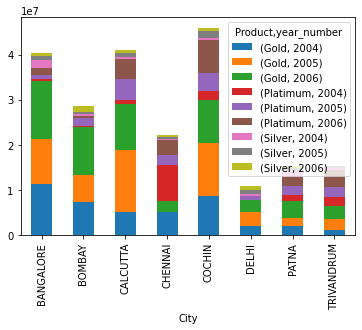

In [30]:
City_Data.plot(kind='bar',stacked=True)
plt.show()

### 4. Create graphs for
#### a. Monthly comparison of total spends, city wise

In [31]:
Monthy_Spend=pd.pivot_table(data=df1,index="City",columns=['month'],values='Amount',aggfunc='sum')

In [32]:
Monthy_Spend

month,1,2,3,4,5,6,7,8,9,10,11,12
City,,,,,,,,,,,,
BANGALORE,10381507.56,6196577.89,6311336.17,4008318.15,8877155.57,222224.51,683006.52,705705.08,485068.50,484267.44,1622070.85,484408.78
BOMBAY,6826371.64,7765392.24,6073096.36,2858415.10,1175763.48,429896.51,309552.34,538090.29,388125.20,680284.58,480740.62,1077399.02
CALCUTTA,1186365.49,4032673.32,4980315.62,4144036.96,13766295.96,1891740.19,2074084.69,2405258.78,2074525.85,522262.45,3390394.50,640178.49
CHENNAI,13052137.13,2670331.19,2685264.72,3198091.72,447810.89,15000.00,15000.00,15000.00,10000.00,NaN,20000.00,NaN
COCHIN,11134874.03,4971755.60,5803851.55,3410797.79,6012733.74,2735328.32,1963753.01,2561935.75,1597348.10,1391300.42,2488082.03,1891753.16
DELHI,2166512.33,1277992.38,986681.89,446359.74,1922132.49,984560.47,826934.82,509918.78,487862.64,425888.05,367778.31,515664.64
PATNA,4357000.33,4925969.49,3414409.99,298389.14,444308.63,6588.51,221293.03,282318.78,342428.74,362560.44,470973.98,134345.91
TRIVANDRUM,639772.14,2361556.08,1939988.69,3585217.15,4166026.78,5000.50,585983.80,258596.15,403773.44,10001.00,1371239.14,10001.00


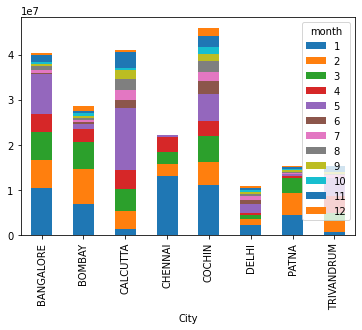

In [33]:
Monthy_Spend.plot(kind='bar',stacked=True)
plt.show()

 #### b. Comparison of yearly spend on air tickets

In [36]:
Yearly_Spend=pd.pivot_table(data=df1[df1.Type=='AIR TICKET'],index='Type',columns='year_number',values='Amount',aggfunc='sum')

In [37]:
Yearly_Spend

year_number,2004,2005,2006
Type,,,
AIR TICKET,7147638.36,5733069.27,7275139.49


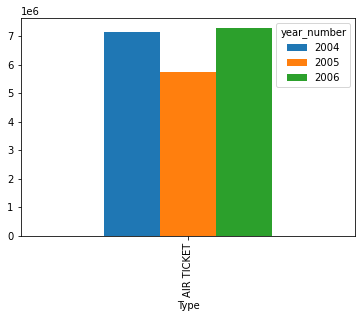

In [38]:
Yearly_Spend.plot(kind='bar')
plt.show()

#### c. Comparison of monthly spend for each product

In [39]:
Monthy_Spend_Product=pd.pivot_table(data=df1,index='Product',columns='month',values='Amount',aggfunc='sum')

In [40]:
Monthy_Spend_Product

month,1,2,3,4,5,6,7,8,9,10,11,12
Product,,,,,,,,,,,,
Gold,33102960.98,21120770.00,21239112.02,13392432.24,26773390.63,4099798.32,4899704.42,4977512.60,3700537.60,2898527.26,6745771.80,3249837.19
Platimum,12629850.06,9018406.65,8555991.57,6240221.33,7425047.48,2067243.21,1549577.80,2031471.21,1773146.31,878035.62,2814509.83,1403912.31
Silver,4011729.61,4063071.54,2399841.40,2316972.18,2613789.43,123297.48,230325.99,267839.80,315448.56,100001.50,650997.80,100001.50


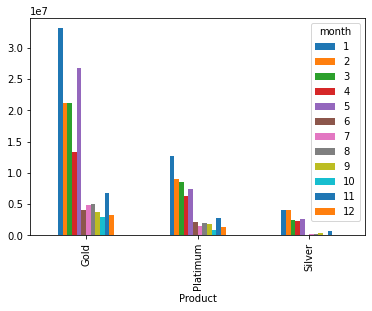

In [41]:
Monthy_Spend_Product.plot(kind='bar')
plt.show()

#### 5. Write user defined PYTHON function to perform the following analysis:
#### You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers.

In [42]:
def top_customers():
    prod = input("Enter product name : ")
    time = input("Enter year  : ")
    Top_10 = df2.groupby(['Customer','City']).sum().sort_values("Amount",ascending = False).head(10)
    return Top_10    

In [43]:
df2['yearly']=df2.Month.apply(lambda x:x.year)
df2['monthly']=df2.Month.apply(lambda x:x.month)

In [44]:
def top10Customers(product_category,time_period):
    return df2.loc[(df2.Product == product_category)].groupby(['Customer','City','Product',time_period]).Amount.sum().reset_index().sort_values('Amount',ascending=False).head(10)

In [45]:
product_category=str(input("Please Enter Product Category and product category should be in Gold/Silver/Platinum: "))
time_period=str(input("Please Enter Time Period and time period should be in yearly/monthly: "))

Please Enter Product Category and product category should be in Gold/Silver/Platinum: Silver
Please Enter Time Period and time period should be in yearly/monthly: yearly


In [46]:
top10Customers_Analysis=top10Customers(product_category,time_period)

In [47]:
top10Customers_Analysis

,Customer,City,Product,yearly,Amount
8,A22,BOMBAY,Silver,2006,1856735.49
9,A23,BANGALORE,Silver,2004,1805097.59
16,A25,COCHIN,Silver,2005,1625301.03
14,A24,DELHI,Silver,2006,1347137.57
44,A8,PATNA,Silver,2004,1131824.40
1,A18,BANGALORE,Silver,2004,1091592.71
21,A57,TRIVANDRUM,Silver,2004,1078554.42
18,A46,PATNA,Silver,2004,1013951.50
19,A46,PATNA,Silver,2005,842007.46
35,A7,COCHIN,Silver,2006,828077.12


### End of assignment 2 Credit Card 